In [145]:
#Packages

import numpy as np
from amortization.amount import calculate_amortization_amount
from amortization.schedule import amortization_schedule
import matplotlib.pyplot as plt
from pyloan import pyloan
import pandas as pd
import math

In [201]:
#Constants

#Loan
PurchasePriceVec = np.array([640000, 680000])
PurchasePrice = 640000 #Dollars

DownPaymentVec = np.array([128000, 136000])
DownPayment = 128000 #Dollars

LoanValueVec = np.zeros([2], dtype = 'single')
for i in range(len(LoanValueVec)):
    LoanValueVec[i] = PurchasePriceVec[i] - DownPaymentVec[i]
LoanValue = PurchasePrice-DownPayment

LTYears = 30
LoanTerm = LTYears*12 #Months
LoanRate = 6 #Rate, as a percent

#Base Costs
MaintCostsVec = np.array([6000,4000])
MaintCosts = 6000 #Dollars per year

TaxHouseVec = np.array([5000, 6000])
TaxHouse = 5000 #Dollars per year

#VariableCosts
Bills = 10 #Dollars per day (rented) Assumes 300 for fully rented month
Cleaning = 30 #Dollars per day (rented) (Is this even close to accurate?)

#Income

WeekendRateVec = np.array([686,500])
WeekendRate = 686 #Dollars per night

WeekdayRateVec = np.array([294, 294])
WeekdayRate = 294 # Dollars per night

#PercentRentedWeekend = .98 #Rate !!For MC this is a distribution, defined in section 2
#PercentRentedWeekday = .39 #Rate !!For MC this is a distribution, defined in section 2


#Constants
SummerDaysInYear = 365/2 #This is actually weekend
WinterDaysInYear = 365/5 #This is actually weekday
DaysinYear = 365

In [202]:
#Calculate Loan Info

LoanPaymentVec = np.zeros(2)
for i in range(len(LoanValueVec)):
    LoanPaymentVec[i] = calculate_amortization_amount(LoanValueVec[i], LoanRate/100, LoanTerm)

    

In [203]:
LoanPayment = calculate_amortization_amount(LoanValue, LoanRate/100, LoanTerm)

In [204]:
LoanVec = np.empty([2], dtype=object)

for i in range(len(LoanVec)):
    loan = pyloan.Loan(loan_amount=LoanValueVec[i].item(),interest_rate=LoanRate,loan_term=LTYears,start_date='2023-07-16')
    LoanVec[i] = loan

In [205]:
loan = pyloan.Loan(loan_amount=LoanValue,interest_rate=LoanRate,loan_term=LTYears,start_date='2023-07-16')

In [206]:
#Populate Loan Amortization table

Balances = np.zeros([len(LoanVec),LTYears])

#for each loan in loanvec
for i in range(len(LoanVec)):
    
    payment_schedule = LoanVec[i].get_payment_schedule()
    
    schedule = pd.DataFrame.from_records(payment_schedule,columns=pyloan.Payment._fields)

    schedule = pd.DataFrame.to_numpy(schedule)  
    
    j = 0

    #populate yearly numbers only
    for each 
    while j < 360:
        
        if j%12 == 0:
       
            Balances[i,int(j/12)] = schedule[j,6]
        j+=1

        

SyntaxError: invalid syntax (1616688050.py, line 17)

# Section 2 - MonteCarlo Analysis
#
# 6 series are generated
### 0. Date
### 1. Cumulative Profit
### 2. Brokerage account value, subtracting loan payment from brokerage acct, reinvesting profits back into account
### 3. Brokerage account only, beginning balance of loan value, not purchasing property
### 4. Property Value
### 5. Net Worth
#
#

# 3 Dimensions
### Iteration, Year, Data Series


# Change to 4 Dimensions
### Property, Iteration, Year, Data Series

In [207]:
#Distributions
#1YrReturnS&P https://klementoninvesting.substack.com/p/the-distribution-of-stock-market
#1Yr return housing https://www.creditkarma.com/home-loans/i/average-home-value-increase-per-year

muMkt = .1
sigmaMkt = .1

muHousing = .042
sigmaHousing = .04

#Single Values
muSummerRentPct = .98
sigmaSummerRentPct = .1

#Multiple Values
muSummerRentPctVec = np.array([.98, .98])
sigmaSummerRentPctVec = np.array([.1, .1])

#Single Valules
muWinterRentPct = .39
sigmaWinterRentPct = .1

#Multiple Values
muWinterRentPctVec = np.array([.39, .39])
sigmaWinterRentPctVec = np.array([.1, .1])

#initialization
iterations = 1000
YearlyData = np.zeros([len(PurchasePriceVec), iterations,LTYears,7]) #Dimensions: Property, Layer(Iteration), row(Year), column(Columns = Year, RentalCumulativeIncome, BrokerageValueReinvest, 600kNoHouse, Property Value, Overall net worth)
YearlyData[:,:,0,0] = 0 #Current year 0
YearlyData[:,:,0,1] = 0 #initial cumulative rental income
YearlyData[:,:,0,2] = 0 #InitialBrokerageAcctValue

for i in range(len(DownPaymentVec)):
    YearlyData[i,:,0,3] = DownPaymentVec[i] #Brokerage account value only, no property purchase
    YearlyData[i,:,0,4] = PurchasePriceVec[i] #Property Value Only
    YearlyData[i,:,0,5] = DownPaymentVec[i] #Comb,ined net worth, brokerage acct value, property appreciation, current loan value subtracted. Gets 3 series added, so do not need initiate at 120


In [208]:
#j = 0 
#k = 1 #k=0 already set in initializations above

#Set J to K
#Set I to J
#Add I


#income and net worth calculations
# i  = Property, j = Layer(Iteration), k = row(Year), column
for i in range(len(PurchasePriceVec)):
    j = 0
    while j < iterations:
    
        k=1
        while k < (30):
        
            #increment year
            YearlyData[i,j,k,0] = YearlyData[i,j,k-1,0] + 1     #Year
    
            #Randomness for stock market
            samplemkt = np.random.normal(muMkt, sigmaMkt, size=1)
        
            #Randomness for rent%
            sampleWinter = np.random.normal(muWinterRentPctVec[i], sigmaWinterRentPctVec[i], size=1)
            sampleSummer = np.random.normal(muSummerRentPctVec[i], sigmaSummerRentPctVec[i], size=1)
        
            #Randomness for housing market
            samplehousingmkt = np.random.normal(muHousing, sigmaHousing, size = 1)
        
            #Calculate rental cumulative income
            Income = SummerDaysInYear*sampleSummer*WeekendRateVec[i] + WinterDaysInYear*sampleWinter*WeekdayRateVec[i] #Dollars
            Expenses = 12*LoanPaymentVec[i] + MaintCostsVec[i] + TaxHouseVec[i] + (sampleSummer*SummerDaysInYear + sampleWinter*WinterDaysInYear)*(Bills+Cleaning)
            
            YearlyData[i,j,k,1] = YearlyData[i,j,k-1,1] + Income-Expenses
        
            #Calculate acct value with profit Reinvestment                                                                   
            YearlyData[i,j,k,2] = YearlyData[i,j,k-1,2] + YearlyData[i,j,k-1,2]*samplemkt + (Income-Expenses)
        
            #Calculate brokerage acct value without rental property                                                                  
            YearlyData[i,j,k,3] = YearlyData[i,j,k-1,3] + YearlyData[i,j,k-1,3]*samplemkt
        
            #Property Value
            YearlyData[i,j,k,4] = YearlyData[i,j,k-1,4] + YearlyData[i,j,k-1,4]*samplehousingmkt
        
        
            #Calculate net worth including rental property appreciation = Acct value with profit reinvest + home value - loan balance
            YearlyData[i,j,k,5] = YearlyData[i,j,k,2] + YearlyData[i,j,k,4] - Balances[i,k]
        
            k+=1
    
        j+=1

In [209]:
YearlyData[1,1,:,1]

array([      0.        ,   46031.60768038,   84274.70049843,
        131368.30038415,  169034.33881819,  196192.4759569 ,
        239135.26587971,  277037.54588709,  319174.81086893,
        360350.11221975,  396246.03425069,  438100.44556115,
        478733.17295832,  535537.37765548,  564360.29359499,
        595990.68383628,  622357.40027953,  650889.2762314 ,
        692595.71831947,  725782.34264817,  766802.57043826,
        788209.26902528,  828658.3682265 ,  868214.46814678,
        907586.79331479,  942632.19100626,  978208.42808784,
       1010661.38615026, 1047309.15523672, 1082508.60898288])

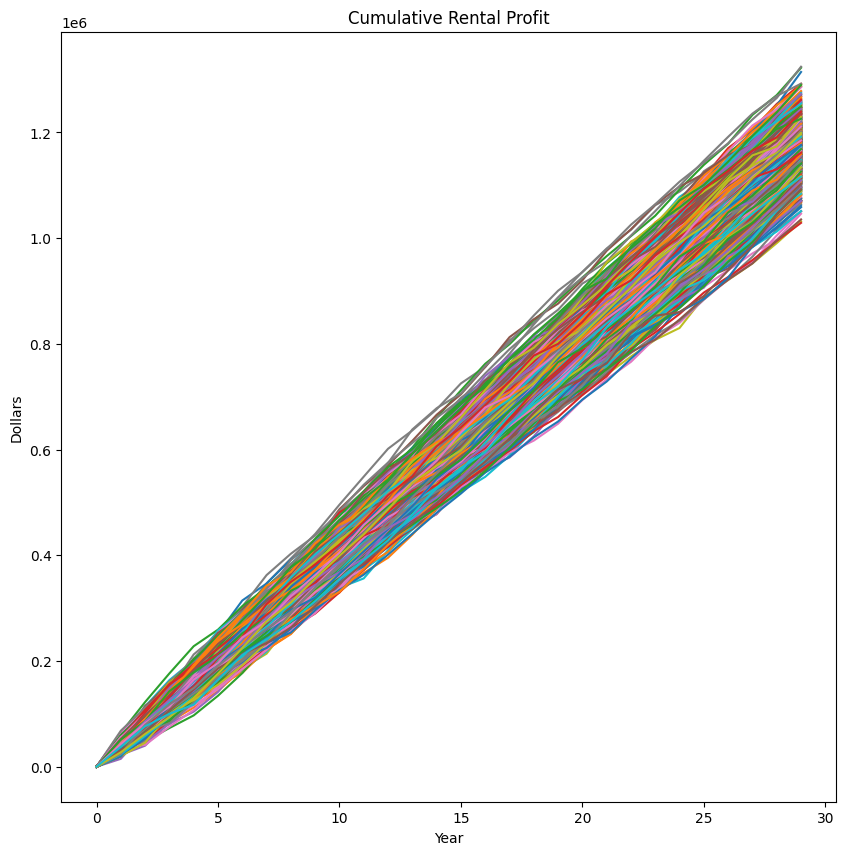

In [210]:
#Plot MonteCarlo for cumulative profit
fig = plt.figure(figsize =(10, 10))
plt.title('Cumulative Rental Profit')

for i in range(YearlyData.shape[1]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[1,i,:,0], YearlyData[1,i,:,1], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

In [226]:
#Define Plot constants
colors = ['green', 'red']
labels = ['Surfside', 'PNW']

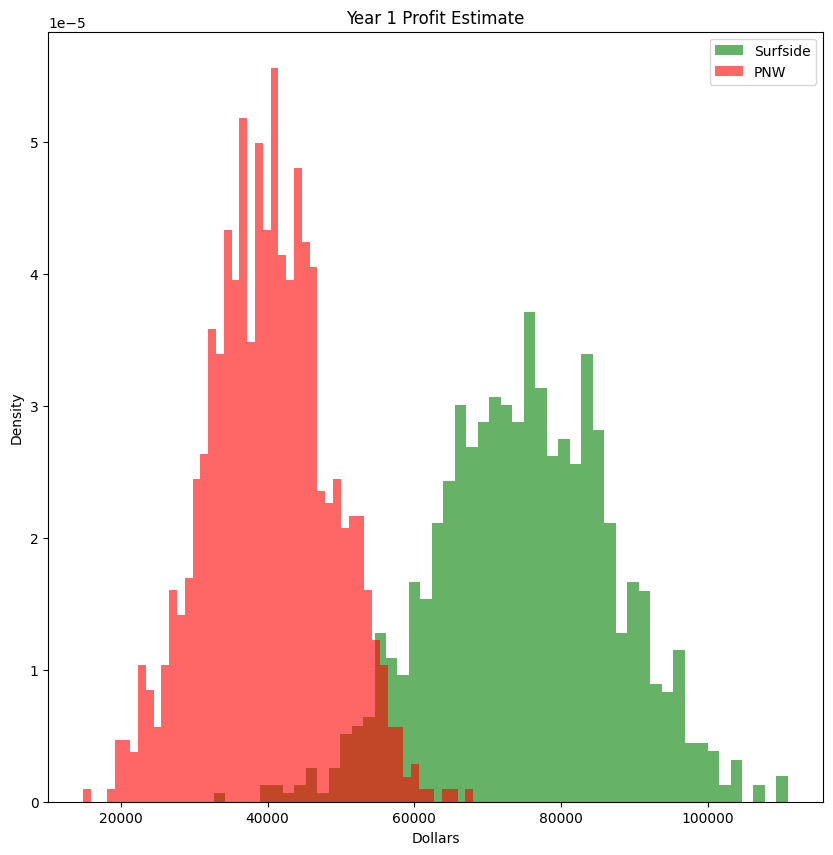

In [227]:
#First years profit estimate
fig = plt.figure(figsize =(10, 10))
plt.title('Year 1 Profit Estimate')

for i in range(len(PurchasePriceVec)):
   
    n, bins, patches = plt.hist(YearlyData[i,:,1,1], bins=50, density = True, color = colors[i], alpha = .6, label=labels[i])
    plt.xlabel('Dollars')
    plt.ylabel('Density')
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.legend()


In [238]:
#Calculate Cap Rate

CapRate = np.zeros([2,1000])        

for i in range(len(YearlyData[:,0,0,0])): #Houses
    for j in range(len(YearlyData[0,:,0,0])): #iterations
        CapRate[i,j] = YearlyData[i,j,1,1]/YearlyData[i,j,0,4] #Profit/HouseValue

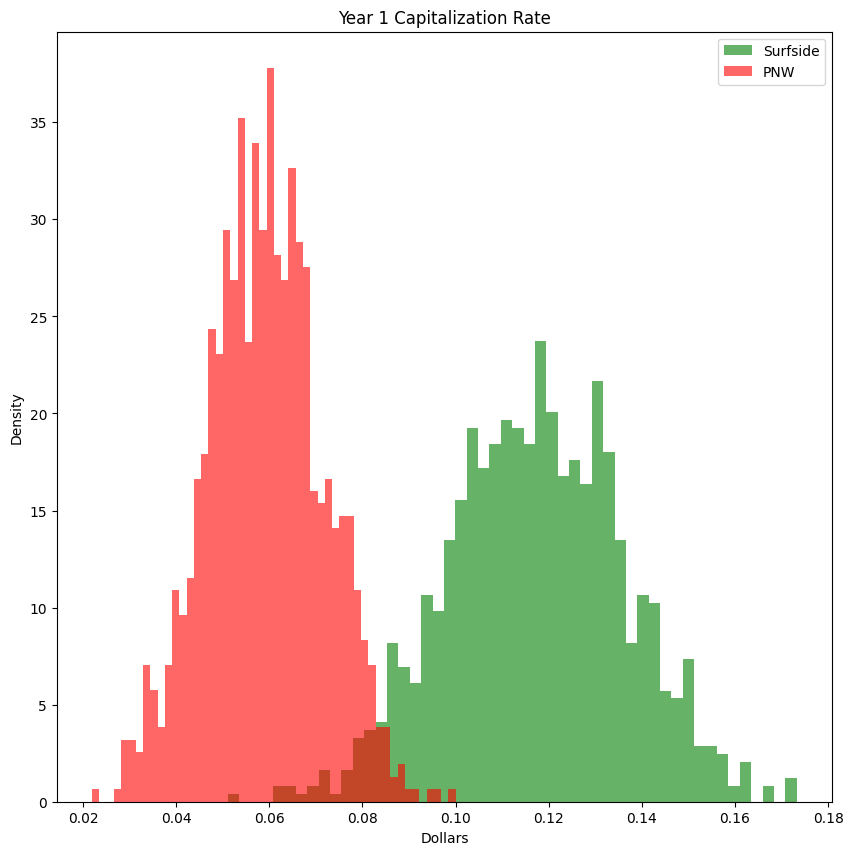

In [240]:
#First years cap rate
fig = plt.figure(figsize =(10, 10))
plt.title('Year 1 Capitalization Rate')

for i in range(len(YearlyData[:,0,0,0])):
   
    n, bins, patches = plt.hist(CapRate[i,:], bins=50, density = True, color = colors[i], alpha = .6, label=labels[i])
    plt.xlabel('Dollars')
    plt.ylabel('Density')
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.legend()

2

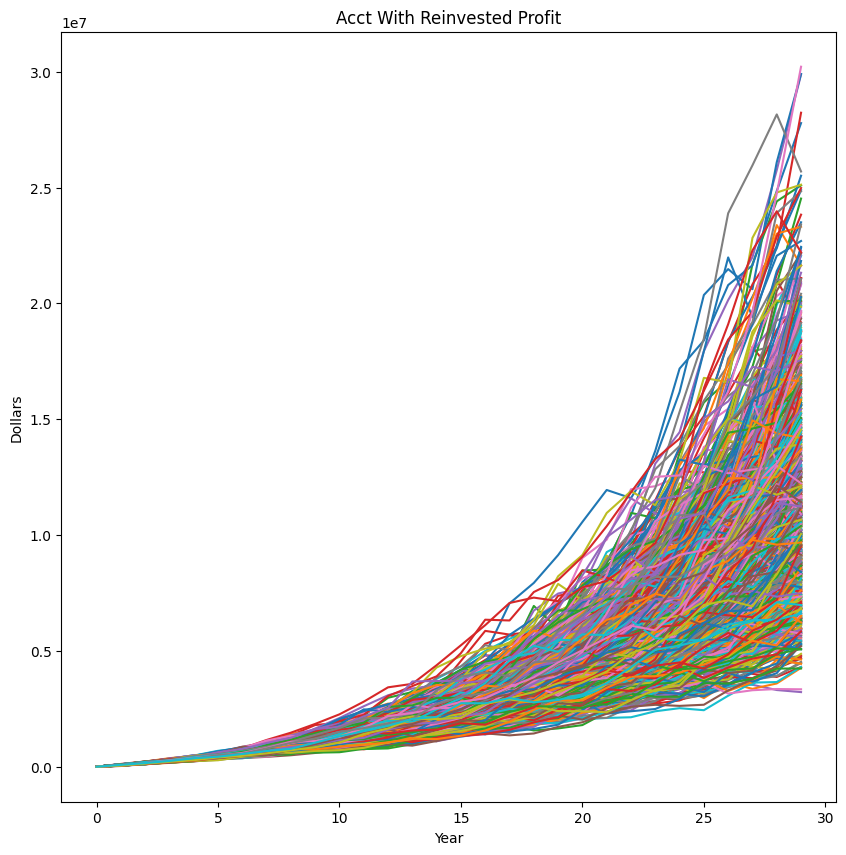

In [10]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Acct With Reinvested Profit')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,2], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

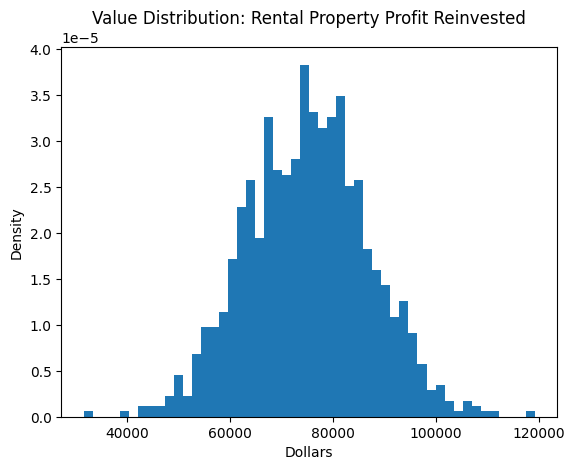

In [11]:
n, bins, patches = plt.hist(YearlyData[:,1,2], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('Value Distribution: Rental Property Profit Reinvested')
bin_centers = 0.5 * (bins[1:] + bins[:-1])


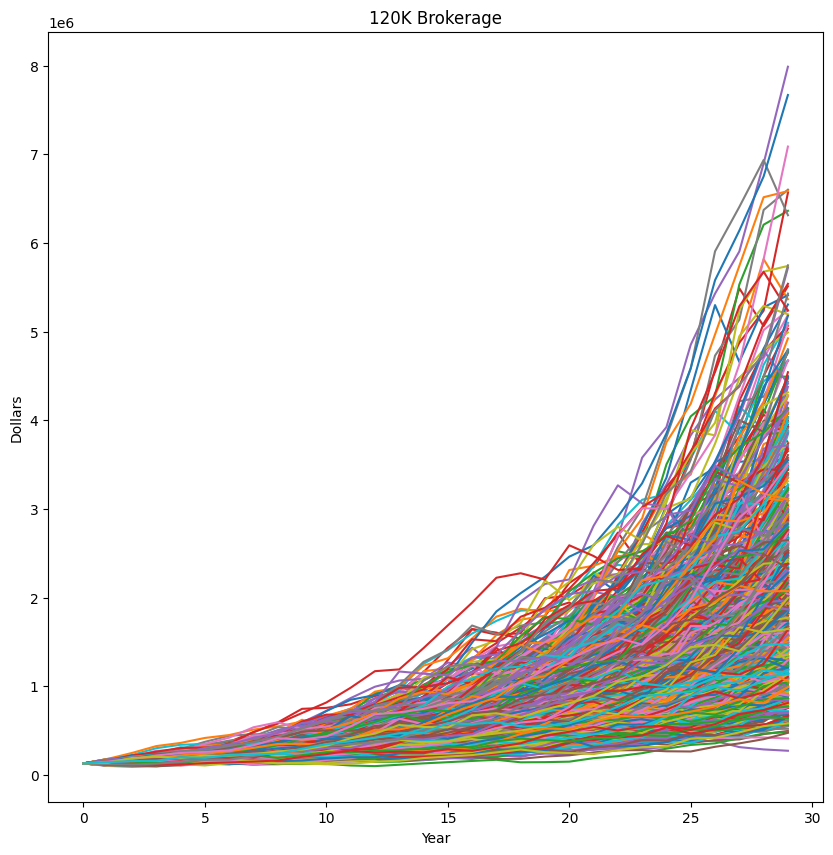

In [12]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('120K Brokerage')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,3], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

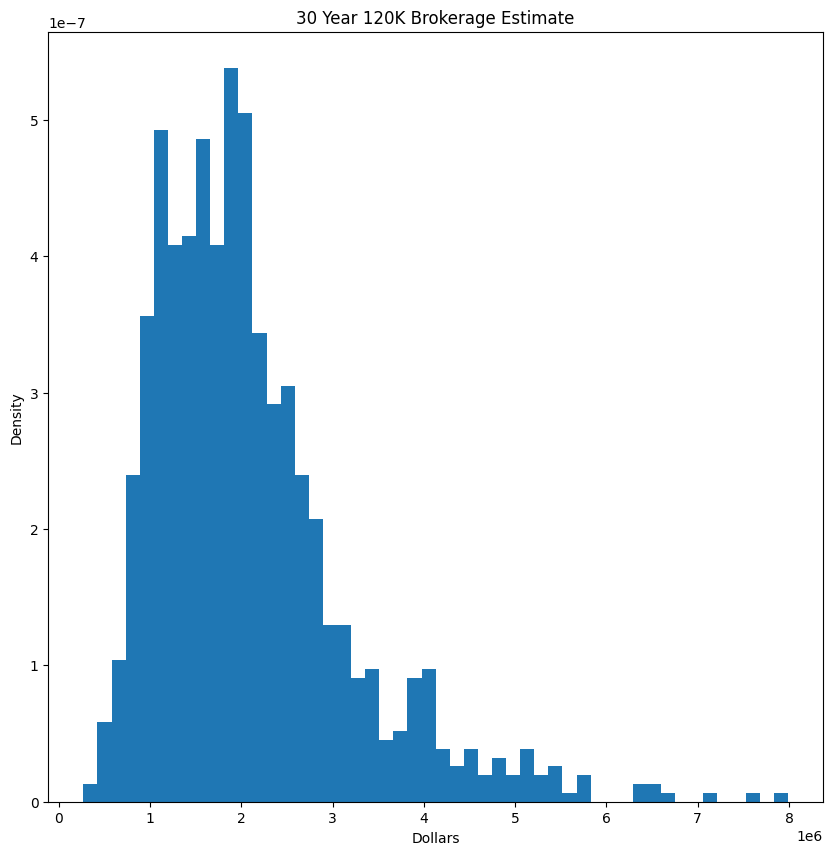

In [13]:
fig = plt.figure(figsize =(10, 10))
n, bins, patches = plt.hist(YearlyData[:,29,3], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('30 Year 120K Brokerage Estimate')

bin_centers = 0.5 * (bins[1:] + bins[:-1])


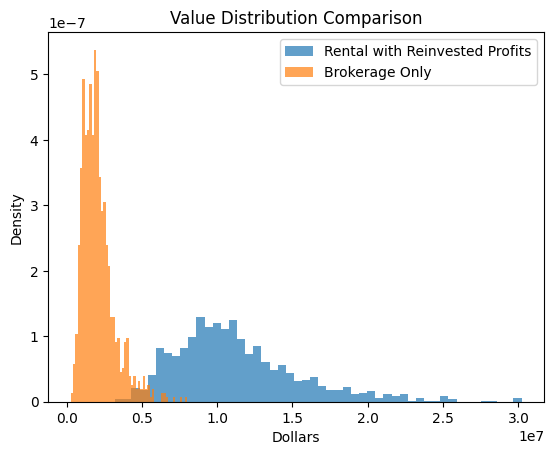

In [14]:
#Plot overlapping
plt.hist(YearlyData[:,29,2], bins=50, density = True, alpha = .7, label = 'Rental with Reinvested Profits')
plt.hist(YearlyData[:,29,3], bins=50, density = True, alpha = .7, label = 'Brokerage Only')
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('Value Distribution Comparison')
plt.legend()

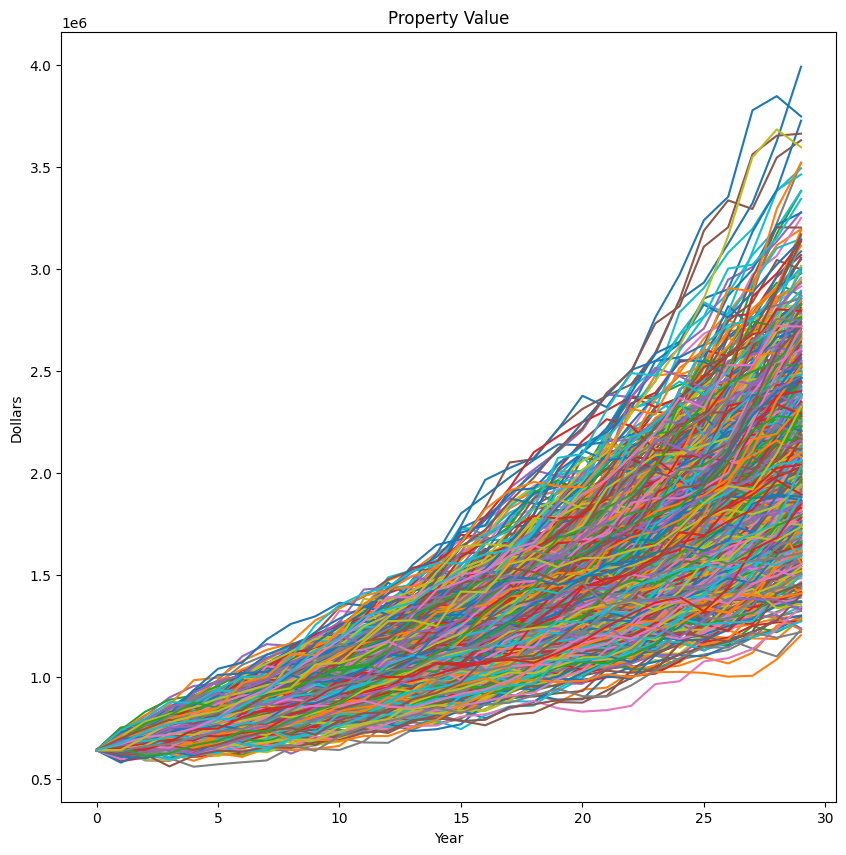

In [15]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Property Value')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,4], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

Text(0.5, 1.0, '30 Year Property Value Estimate')

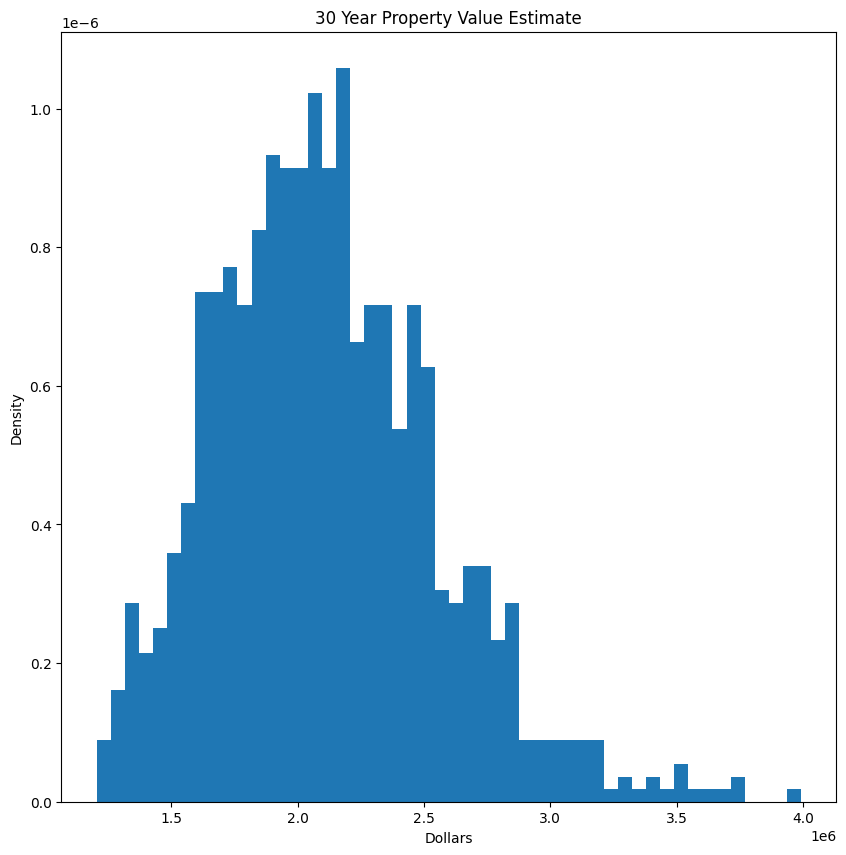

In [16]:
fig = plt.figure(figsize =(10, 10))
plt.hist(YearlyData[:,29,4], bins=50, density = True)
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('30 Year Property Value Estimate')


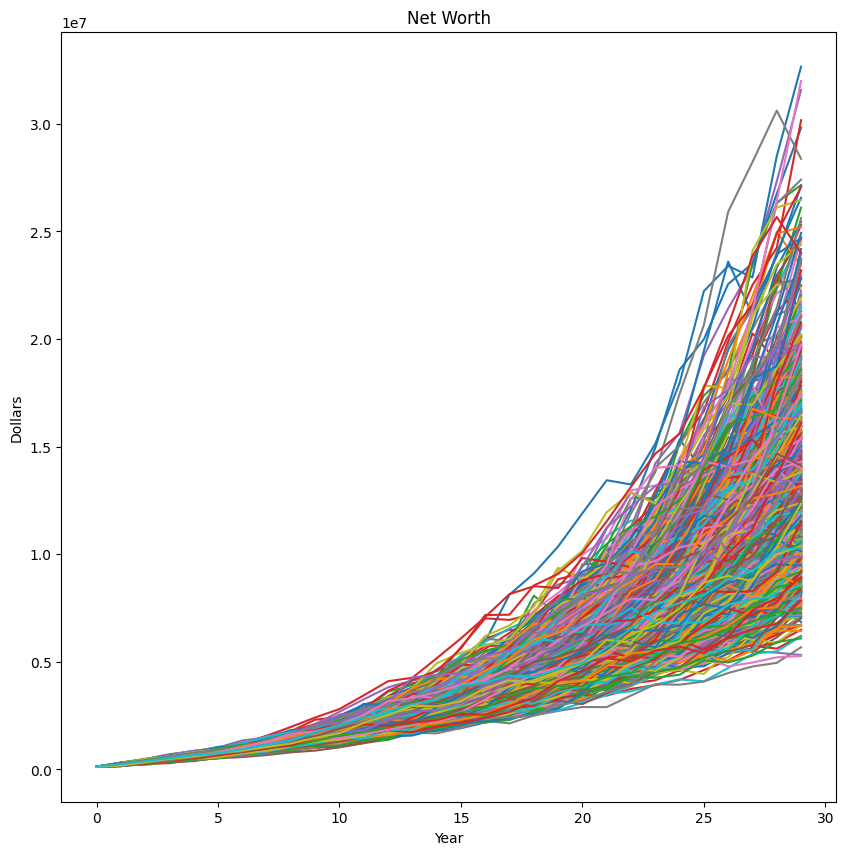

In [17]:
#Plot MonteCarlo

fig = plt.figure(figsize =(10, 10))
plt.title('Net Worth')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,5], label=label)

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')


# Show the plot
plt.show()

Text(0.5, 1.0, '30 Year Net Worth Estimate')

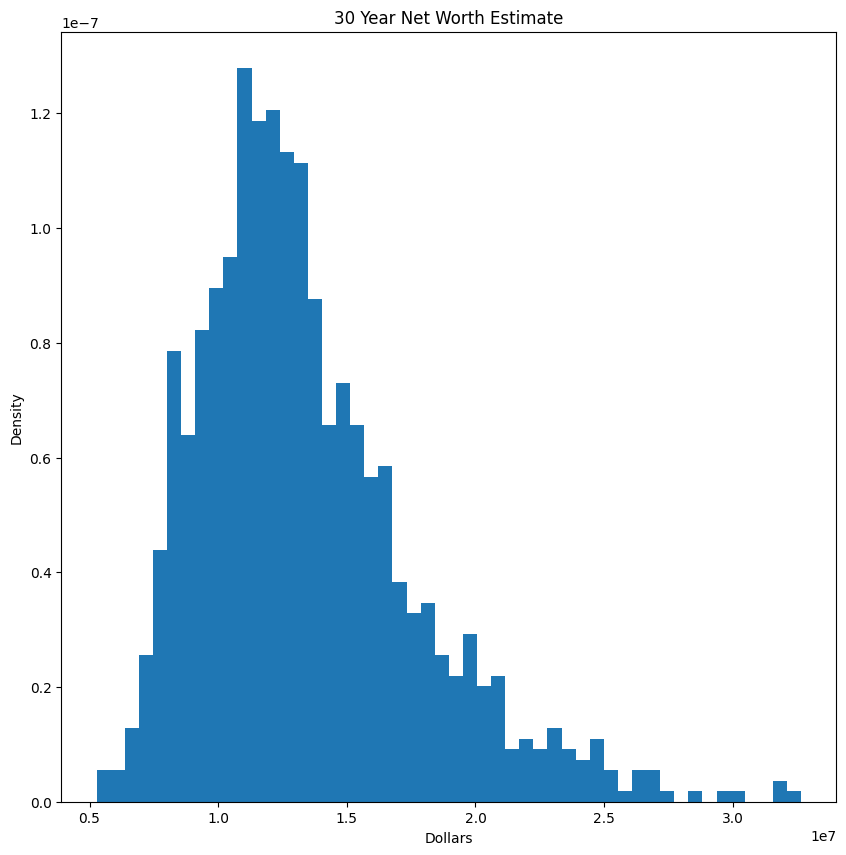

In [18]:
fig = plt.figure(figsize =(10, 10))
plt.hist(YearlyData[:,29,5], bins=50, density = True)

plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('30 Year Net Worth Estimate')


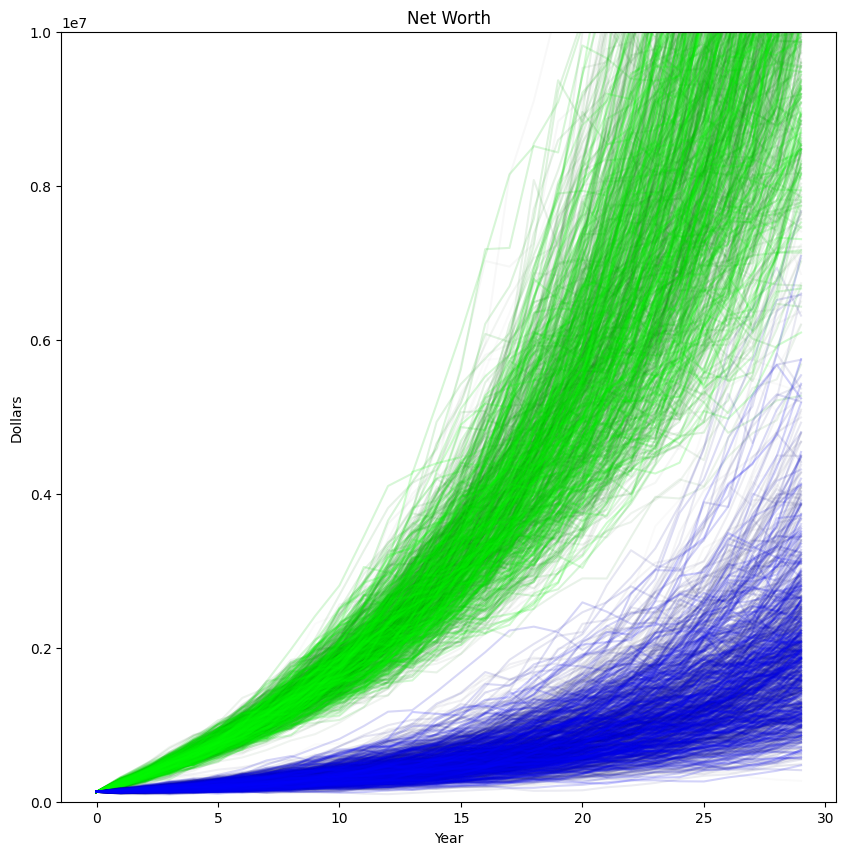

In [19]:
#Plot MonteCarlo 

fig = plt.figure(figsize =(10, 10))
plt.title('Net Worth')
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,5], label=label, c = [0,i/1000,0, i/5000])
for i in range(YearlyData.shape[0]):
    label = f'data{i}'   # Generate a label for the series
    plt.plot(YearlyData[i,:,0], YearlyData[i,:,3], label=label, c = [0,0,i/1000, i/5000])
    
# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.ylim([0,10000000])

# Show the plot
plt.show()

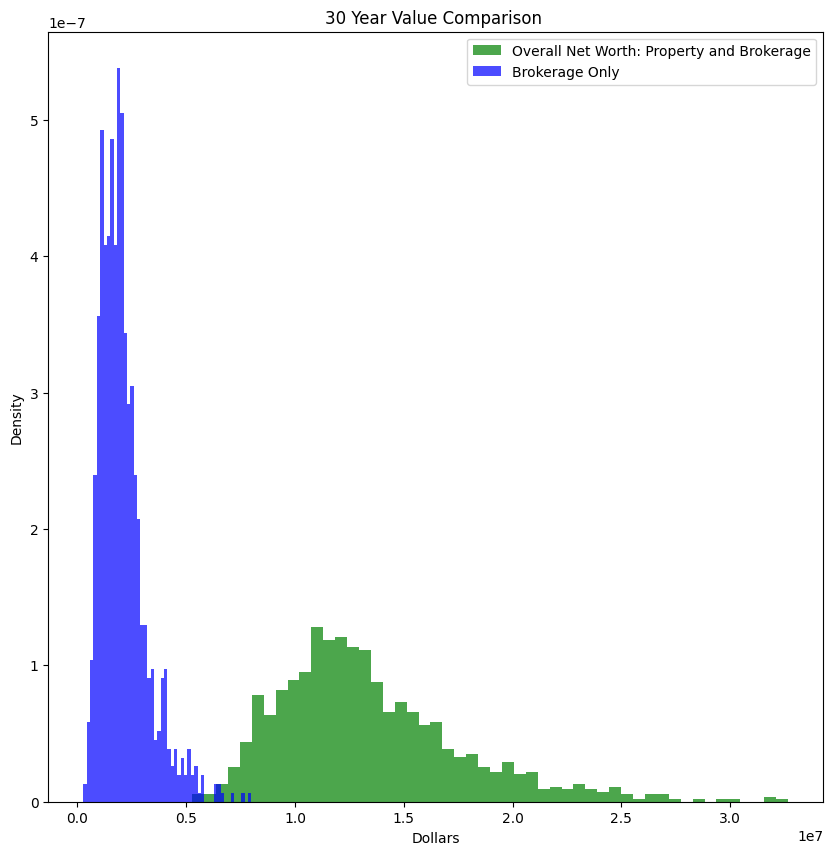

In [20]:
#Plot overlapping
fig = plt.figure(figsize =(10, 10))
plt.hist(YearlyData[:,29,5], bins=50, density = True, alpha = .7, label = 'Overall Net Worth: Property and Brokerage', color = 'green')
plt.hist(YearlyData[:,29,3], bins=50, density = True, alpha = .7, label = 'Brokerage Only', color = [0,0,1])
plt.xlabel('Dollars')
plt.ylabel('Density')
plt.title('30 Year Value Comparison ')
plt.legend()

In [16]:
#Calculate net worth including rental property appreciation = Acct value with profit reinvest + home value - loan balance
YearlyData[i,1,2] + YearlyData[i,1,4] - Balances[1]

245492.804117002